<a href="https://colab.research.google.com/github/JungMinNoh/19-lab/blob/master/%EC%A0%90%ED%94%84_%ED%88%AC_%ED%8C%8C%EC%9D%B4%EC%8D%AC_4%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%89_%ED%95%99%EC%8A%B5_%EC%88%99%EC%A0%9C_2019_9_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 수치미분

##4.3.1 미분

In [0]:
def numerical_diff(f,x):
  h = 10e-50
  return (f(x+h)-f(x))/h

In [0]:
np.float32(1e-50)

NameError: ignored

진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.


### 첫번째 문제
앞의 식의 구현에서는 h 에 가급적 작은 값을 대입하고 싶었기에 10e^-50이라는 작은 값을 이용했다.
이 값은 0.000....1 의 형태에서 소수점 아래 0이 49개라는 의미인데, 이 방식은 반올림 오차 문제를 일으킨다. 반올림 오차는 작은값 (가령 소수점 8자리 이하)가 생략되어 최종계산 결과에 오차를 발생하게 한다.

### 두번째 문제
함수 f의 차분과 관련된것. 앞의 구현에서는 x+h와 x사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다.
진정한 미분은 x 위치의 함수의 기울기(접선)에 해당하지만, 이 번 구현에서 미분은 x+h와 x 사이의 기울기에 해당한다.

두 개선점을 이용 -> (x+h) 와 (x-h)의 차분을 계산. **중심차분, 중앙차분** 으로 미분을 구현해본다

In [0]:
def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h)-f(x-h))/(2*h)

1.   **해석적 미분** = 오차를 포함하지 않는 진정한 미분
2.   **수치적 미분** = 근사치로 계산한 미분

## 4.3.2 수치 미분의 예

In [0]:
def function_1(x):
  return 0.01*x**2 + 0.1*x # y= 0.01x^2 + 0.1x 나타낸 수식
  

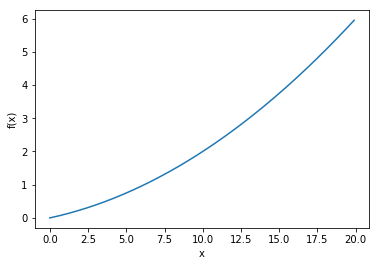

In [0]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0 에서 20까지 0.1 간격의 배열 x 를 만든다 (20은 미포함)
y = function_1(x) # y를 f(x) 로 지정
plt.xlabel("x") # x 축을 x로 명명
plt.ylabel("f(x)") # y 축을 f(x)로 명명
plt.plot(x,y) #(x,y)에 대해서 plot 하라
plt.show()

x=5 일때와 10일때 이 함수의 미분을 계산해보자

In [0]:
numerical_diff(function_1,5) # diff 는 미분

0.1999999999990898

In [0]:
numerical_diff(function_1,10)

0.2999999999986347

해석적 해는 df(x)/dx = 0.02x+01 이다. x가 5일때와 10일때의 '진정한 미분'은 0.2와 0.3 인데 수치 미분의 결과를 비교해보면 그 오차는 매우 작다

0.1999999999990898


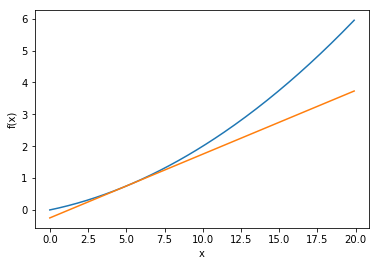

In [0]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 4.3.3 편미분

f(x0,x1)=x0^2+x1^2 을 구현해보자. 앞의 예와 달리 변수는 x0,x1 2개이다.

In [0]:
def function_2(x):
  return x[0]**2 + x[1]**2
  return np.sum(x**2)

In [0]:
import numpy as np
import matplotlib.pylab as plt

x[0] = np.arange(-3.0, 3.0, 1.0) # -3 에서 3까지 1 간격의 배열 x0 를 만든다 (20은 미포함)
x[1] = np.arange(-3.0, 3.0, 1.0) # -3 에서 3까지 1 간격의 배열 x1 를 만든다 (20은 미포함)
z = function_2(x) # z를 f(x) 로 지정
plt.xlabel("x[0]") # x 축을 x로 명명
plt.ylabel("x[1]") # y 축을 f(x)로 명명
plt.zlabel("f(x0,x1)")
plt.plot(x[0],x[1]) #(x,y)에 대해서 plot 하라
plt.show()

ValueError: ignored

3차원 그림 그릴려고 했는데 잘 안되네요. 더 찾아 보겠습니다.

편미분 구하기

**문제 1**: x0=3, x1=4 일때 x0 에 대한 편미분 af/ax0 를 구하라

In [0]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

**문제2** : x0=3 x1=4 일때 x1에 대한 편미분 af/ax1을 구하라 

In [0]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

변수 x0,x1 중 하나를 값을 대입해서 구한 방법들임.

## 4.4 기울기

앞절의 예에서는 x0과 x1의 편미분을 변수별로 따로 계산했다. 그럼 x0과 x1의 편미분을 동시에 계산하고 싶다면 어떻게 해야할까?
예를 들어 x0=3, x1=4 일때 양쪽의 편미분을 (af/ax0, af/ax1)을 계산한다고 생각해보자. 이때 (af/ax0, af/ax1)처럼 보든 변수의 편미분을 벡터로 정리한것을 **기울기** gradient 라고 한다.

In [0]:
def numerical_gradient(f,x):
  h= 1e-4 #0.0001 을 나타냄
  grad = np.zeros_like(x) # x 와 형상이 같은 배열을 생성
  
  for idx in range(x.size):
    tmp_val = x[idx] 
    #f(x+h) 를 계산
    x[idx] = tmp_val+h
    fxh1 = f(x)
    
    #f(x-h) 를 계산
    x[idx] = tmp_val-h
    fxh2 = f(x)
    
    grad[idx] = (fxh1-fxh2)/(2*h)
    x[idx] = tmp_val #값 복원
  return grad

numerical_gradioent(f,x) 함수의 인수인 f는 함수이고 x 는 넘파이 배열 이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다. (3,4),(0,2),(3,0) 에서의 기울기를 구해보자


In [0]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [0]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [0]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

점 3,4 의 기울기는 (6,8) 점 0,2 의 기울기는 (0,4) 라는 결과를 얻는다


No handles with labels found to put in legend.


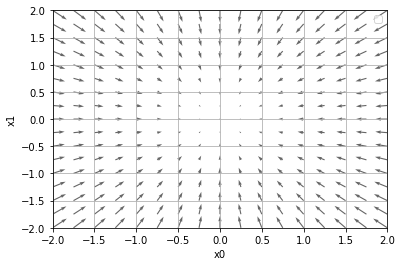

In [0]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

## 4.4.1 경사법(경사 하강법)

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr*grad
    
  return x

**인수f 는 최적화 하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복횟수를 뜻함|**

**함수의 기울기는 numerical_gradient(f,x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다**

***문제: 경사법으로 f(x0,x1)=x0^2+x1^2의 최솟값을 구하라.***

In [0]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

최종 결과는 (-6.11110793e-10, 8.14814391e-10) 으로 거의 (0,0) 에 가까운 결과이다. 실제로 진정한 최솟값은 (0,0)이므로 경사법에 거의 정확한 결과를 얻은 것이다.

In [0]:
# 학습률이 너무 큰 예 lr=10.0
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

학습률이 너무 크면 큰 값으로 발산한다

In [0]:
# 학습률이 너무 작은 예 lr=1e-10
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 작으면 거의 갱신되지 않은 채로 끝난다.

**학습률을 적절히 설정해주는것이 중요하다**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


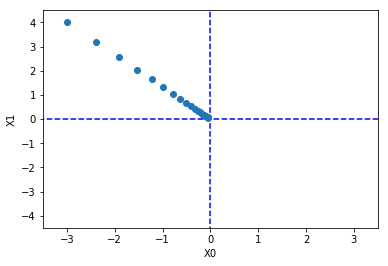

In [65]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 4.4.2 신경망에서의 기울기

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/')

import mnist
from mnist import load_mnist

In [64]:
# coding: utf-8
import sys, os
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks')# 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.3116473   0.08531513 -0.39696243]
 [ 0.46747095  0.1279727  -0.59544365]]


In [68]:
net = simpleNet()
print(net.W) #가중치 매개변수
[[ 0.47355232  0.9977393  0.84668094]
 [ 0.85557411  0.03563661 0.69422093]]

SyntaxError: ignored

## 4.5 학습 알고리즘 구현하기

### 전제
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응 하도록 조정하는 과정을 '
학습' 이라 합니다. 신경망 학습은 다음과 같이 4단계로 수행합니다.
### 1단계 - 미니배치
훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.
### 2단계 - 기울기 산출
미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시 합니다.
### 3단계 - 매개 변수 갱신
가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.
### 4단계 - 반복
1~3단계를 반복합니다.

## 4.5.1 2층 신경망 클래스 구현하기

In [0]:
# coding: utf-8
import sys, os
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks') # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [69]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784,100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)


(10,)

In [0]:
x = np.random.rand(100,784)
y = net.predict(x)

In [71]:
x = np.random.rand(100,784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x,t)

grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

(10,)

## 4.5.2 미니배치 학습 구현하기

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.7867666666666666, 0.7943
train acc, test acc | 0.87095, 0.8741
train acc, test acc | 0.8968166666666667, 0.9007
train acc, test acc | 0.907, 0.9115
train acc, test acc | 0.91285, 0.9141
train acc, test acc | 0.9184333333333333, 0.9209
train acc, test acc | 0.9224833333333333, 0.9251
train acc, test acc | 0.9265333333333333, 0.9276
train acc, test acc | 0.9306666666666666, 0.932
train acc, test acc | 0.93375, 0.9355
train acc, test acc | 0.9367, 0.9371
train acc, test acc | 0.9393833333333333, 0.9388
train acc, test acc | 0.9405666666666667, 0.9406
train acc, test acc | 0.9434, 0.9424
train acc, test acc | 0.9456333333333333, 0.944
train acc, test acc | 0.9472666666666667, 0.946


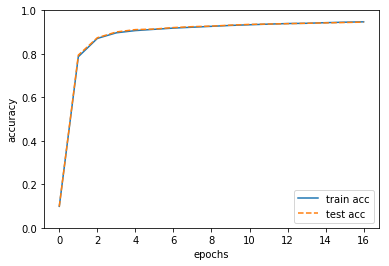

In [73]:
# coding: utf-8
import sys, os
sys.path.insert(0, '/content/gdrive/My Drive/dataset')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()